# Sentiment analysis with BOW representation

Text classification is a machine learning technique that assigns a set of predefined categories to open-ended text. Text classifiers can be used to organize, structure, and categorize pretty much any kind of text – from documents, medical studies and files, and all over the web.

For example, new articles can be organized by topics; support tickets can be organized by urgency; chat conversations can be organized by language; brand mentions can be organized by sentiment; and so on.

Text classification is one of the fundamental tasks in natural language processing with broad applications such as **sentiment analysis**, topic labeling, spam detection, and intent detection.

**Why is Text Classification Important?**

It’s estimated that around 80% of all information is unstructured, with text being one of the most common types of unstructured data. Because of the messy nature of text, analyzing, understanding, organizing, and sorting through text data is hard and time-consuming, so most companies fail to use it to its full potential.

This is where text classification with machine learning comes in. Using text classifiers, companies can automatically structure all manner of relevant text, from emails, legal documents, social media, chatbots, surveys, and more in a fast and cost-effective way. This allows companies to save time analyzing text data, automate business processes, and make data-driven business decisions.

**How Does Text Classification Work?**

Instead of relying on manually crafted rules, machine learning text classification learns to make classifications based on past observations. By using pre-labeled examples as training data, machine learning algorithms can learn the different associations between pieces of text, and that a particular output (i.e., tags) is expected for a particular input (i.e., text). A “tag” is the pre-determined classification or category that any given text could fall into.

The first step towards training a machine learning NLP classifier is feature extraction: a method is used to transform each text into a numerical representation in the form of a vector. One of the most frequently used approaches is bag of words, where a vector represents the frequency of a word in a predefined dictionary of words.

Then, the machine learning algorithm is fed with training data that consists of pairs of feature sets (vectors for each text example) and tags (e.g. sports, politics) to produce a classification model:

![training](https://monkeylearn.com/static/507a7b5d0557f416857a038f553865d1/2ed04/text_process_training.webp)

Once it’s trained with enough training samples, the machine learning model can begin to make accurate predictions. The same feature extractor is used to transform unseen text to feature sets, which can be fed into the classification model to get predictions on tags (e.g., sports, politics):

![prediction](https://monkeylearn.com/static/afa7e0536886ee7152dfa4c628fe59f0/2b924/text_process_prediction.webp)

Text classification with machine learning is usually much more accurate than human-crafted rule systems, especially on complex NLP classification tasks. Also, classifiers with machine learning are easier to maintain and you can always tag new examples to learn new tasks.

## Today lab

In this lab we use part of the 'Amazon_Unlocked_Mobile.csv' dataset published by Kaggle. The dataset contain the following information:
* Product Name
* Brand Name
* Price
* Rating
* Reviews
* Review Votes

We are mainly interested by the 'Reviews' (X) and by the 'Rating' (y)

The goal is to try to predict the 'Rating' after reading the 'Reviews'. I've prepared for you TRAIN and TEST set.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Today-lab" data-toc-modified-id="Today-lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Today lab</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load dataset</a></span><ul class="toc-item"><li><span><a href="#About-Train,-validation-and-test-sets" data-toc-modified-id="About-Train,-validation-and-test-sets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7" rel="nofollow" target="_blank">About Train, validation and test sets</a></a></span></li><li><span><a href="#Undestand-the-dataset" data-toc-modified-id="Undestand-the-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Undestand the dataset</a></span></li></ul></li><li><span><a href="#Build-X-(features-vectors)-and-y-(labels)" data-toc-modified-id="Build-X-(features-vectors)-and-y-(labels)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build X (features vectors) and y (labels)</a></span></li><li><span><a href="#Our-previous-baseline" data-toc-modified-id="Our-previous-baseline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Our previous baseline</a></span></li><li><span><a href="#Build-an-MLP-Classifier" data-toc-modified-id="Build-an-MLP-Classifier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build an MLP Classifier</a></span></li></ul></div>

## Load dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Polytech\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Polytech\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Polytech\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Polytech\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Polytech\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

True

In [2]:
TRAIN = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/train.csv.gz")
TEST = pd.read_csv("http://www.i3s.unice.fr/~riveill/dataset/Amazon_Unlocked_Mobile/test.csv.gz")

TRAIN.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Samsung Galaxy Note 4 N910C Unlocked Cellphone...,Samsung,449.99,4,I love it!!! I absolutely love it!! 👌👍,0.0
1,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,I love the BLU phones! This is my second one t...,4.0
2,Apple iPhone 6 128GB Silver AT&T,Apple,599.95,5,Great phone,1.0
3,BLU Advance 4.0L Unlocked Smartphone -US GSM -...,BLU,51.99,4,Very happy with the performance. The apps work...,2.0
4,Huawei P8 Lite US Version- 5 Unlocked Android ...,Huawei,198.99,5,Easy to use great price,0.0


## Build X (features vectors) and y (labels)

In [3]:
# Construct X_train and y_train
X_train = TRAIN['Reviews'].fillna("")
y_train = TRAIN['Rating']
X_train.shape, y_train.shape

((5000,), (5000,))

# Detect imbalanced dataset 

In [4]:
y_train.value_counts()

5    2692
1     885
4     747
3     385
2     291
Name: Rating, dtype: int64

In [5]:
# Construct X_test and y_test
X_test = TEST['Reviews'].fillna("")
y_test = TEST['Rating']
X_test.shape, y_test.shape

((1000,), (1000,))

## Features extraction

A bag-of-words model is a way of extracting features from text so the text input can be used with machine learning algorithms or neural networks.

Each document, in this case a review, is converted into a vector representation. The number of items in the vector representing a document corresponds to the number of words in the vocabulary. The larger the vocabulary, the longer the vector representation, hence the preference for smaller vocabularies in the previous section.

Words in a document are scored and the scores are placed in the corresponding location in the representation.

In order to extract feature, you can use `CountVectorizer` or `TfidfVectorizer` and you can perform the desired text cleaning.

$$[TODO - Students]$$ 
> * Quickly remind what are `CountVectorizer`, `TfidfVectorizer` and how they work.<br>
  Convert a collection of text documents to a matrix of token counts.
> * Build the BOW representation for train and test set

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(X_train)
X_train_encoded = cv.transform(X_train)
X_test_encoded = cv.transform(X_test)
X_train_encoded.shape,X_test_encoded.shape

((5000, 8991), (1000, 8991))

## Build a baseline with logistic regression.

Using the previous BOW representation, fit a logistic regression model and evaluate it.

$$[TODO - Students]$$ 
> * Quickly remind what are `LogisticRegression` and how they work.
> * hat are the possible metrics. Choose one and justify your choice.

**Quickly remind what are LogisticRegression and how they work.** <br>
Logistic regression is supervised machine learning algorithm which uses logistic function to model a binary classification<br> Mathematically, a binary logistic model has a dependent variable with 2 possible values such as (pass/ fail). <br>
This one, is represented by a binary indicator which 0 or 1


In [7]:
# Build your model
# Using LogisticRegression from sklearn, fit a first model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # Keep default settings we will look into hyperparameters fine-tuning later on
lr.fit(X_train_encoded, y_train)

C:\Users\Polytech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
# Encode X_test
X_test_encoded = cv.transform(X_test)
X_test_encoded.shape

(1000, 8991)

In [9]:
# Evaluate your model
# Using classification_report, evaluate the model
from sklearn.metrics import classification_report

y_pred = lr.predict(X_test_encoded)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.64      0.64      0.64       159
           2       0.16      0.29      0.20        28
           3       0.15      0.21      0.18        52
           4       0.26      0.43      0.33        99
           5       0.90      0.76      0.82       662

    accuracy                           0.67      1000
   macro avg       0.42      0.47      0.44      1000
weighted avg       0.74      0.67      0.70      1000



The accuracy of the model is 67% 

## Build an MLP Classifier


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

$$[TODO - Students]$$ 
> * Quickly remind what are `Multi Layer Perceptron` and how they work.
> * If necessary, One hot encode the output vectors

**Multi Layer Perceptron** is also called **Multi layer feed forward** : it consists of at least three layers of nodes <br>
an imput layer, hidden layers and an output layer.Except for the input nodes, each node is a neuron that uses a nonlinear activation function such as "Relu", "sgd". MLP utilizes a supervised learning technique called backpropagation for training

In [11]:
# Encode output vector if necessary.
# One hot encode the label
from sklearn import preprocessing
ohe = preprocessing.OneHotEncoder(sparse=False)
# Reshape data

# ohe.fit(y_train.values.reshape(-1, 1))
Y_train = ohe.fit_transform( y_train.values.reshape(-1, 1)).toarray()

# Fit and transform testing data
Y_test = ohe.transform(y_test.values.reshape(-1, 1)).toarray()


In [12]:
Y_train.shape, Y_test.shape

((5000, 5), (1000, 5))

In [13]:
# Buid MLP model
# You can use the following function
def build_MLP(input_shape, activation, layers, nb_class):
    input = Input(shape=(input_shape,), name='input')

    for i, hidden_size in enumerate(layers):
        if i == 0:
            x = Dense(input_shape=(input_shape,), units=hidden_size, activation=activation, name='layer_'+str(i))(input)
        else:
            x = Dense(units=hidden_size, activation=activation, name='layer_'+str(i))(x)

    output = Dense(nb_class, activation='softmax', name='output')(x)
    model = Model(input, output, name = 'bow_classifier')
    model.summary()
    return model

model = build_MLP(X_train_encoded.shape[1],'sigmoid',[10,10],Y_train.shape[1] )

Model: "bow_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 8991)]            0         
_________________________________________________________________
layer_0 (Dense)              (None, 10)                89920     
_________________________________________________________________
layer_1 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 90,085
Trainable params: 90,085
Non-trainable params: 0
_________________________________________________________________


$$[TODO - Students]$$ 
> * What is the size of the input vector and the output vector?

In [14]:
# Define constant
input_dim = X_train_encoded.shape[1]
output_dim = Y_train.shape[1]
input_dim, output_dim

(8991, 5)

$$[TODO - Students]$$ 

> * Build a simple network to predict the star rating of a review using the functional API. It should have the following characteristic : one hidden layer with 256 nodes and relu activation.
> * What is the activation function of the output layer?

In [15]:
# Build your MLP
model1 = build_MLP(X_train_encoded.shape[1],'relu',[256],Y_train.shape[1] )

Model: "bow_classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 8991)]            0         
_________________________________________________________________
layer_0 (Dense)              (None, 256)               2301952   
_________________________________________________________________
output (Dense)               (None, 5)                 1285      
Total params: 2,303,237
Trainable params: 2,303,237
Non-trainable params: 0
_________________________________________________________________


We can see from the summary table above that the **model1** was built with 8991 input vector <br>
and 256 nodes in the hidden layer and 5 classes to predict in the output layer <br>
The activation function of the output is "softmax"

$$[TODO - Students]$$ 

We are now compiling and training the model.
> * Using the tensorflow documentation, explain the purpose the EarlyStopping callback and detail its arguments.
> * Compile the model
> * Fit the model

**explain the purpose the EarlyStopping callback and detail its arguments:** <br>
The early stopping callback is useful since it allows to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

In [16]:
def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [17]:
import tensorflow_addons as tfa
import keras.backend as K

In [18]:
# Compile the model and start training
# I used in metrics before "accuracy" >> check it again
model1.compile(loss='categorical_crossentropy', metrics=[f1_score], optimizer='adam')
# Stop training with early stopping with patience of 20
callbacks_list = [EarlyStopping(monitor='val_f1_score', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

In [19]:
X_train_encoded.shape,Y_train.shape,X_test_encoded.shape,Y_test.shape

((5000, 8991), (5000, 5), (1000, 8991), (1000, 5))

In [20]:
history = model1.fit(X_train_encoded, Y_train, validation_data = (X_test_encoded,Y_test), callbacks=callbacks_list,
                    batch_size=32, epochs=20)

Epoch 1/20


C:\Users\Polytech\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/bow_classifier/layer_0/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/bow_classifier/layer_0/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/bow_classifier/layer_0/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


157/157 [==============================] - 9s 50ms/step - loss: 1.1176 - f1_score: 0.4576 - val_loss: 0.8874 - val_f1_score: 0.6624
Epoch 2/20
157/157 [==============================] - 7s 47ms/step - loss: 0.6326 - f1_score: 0.7598 - val_loss: 0.8844 - val_f1_score: 0.6826
Epoch 3/20
157/157 [==============================] - 7s 47ms/step - loss: 0.4135 - f1_score: 0.8599 - val_loss: 0.9661 - val_f1_score: 0.6818
Epoch 4/20
157/157 [==============================] - 7s 47ms/step - loss: 0.2852 - f1_score: 0.9111 - val_loss: 1.0637 - val_f1_score: 0.6715
Epoch 5/20
157/157 [==============================] - 7s 47ms/step - loss: 0.2101 - f1_score: 0.9391 - val_loss: 1.2315 - val_f1_score: 0.6717
Epoch 6/20
157/157 [==============================] - 8s 49ms/step - loss: 0.1685 - f1_score: 0.9503 - val_loss: 1.3065 - val_f1_score: 0.6723
Epoch 7/20
157/157 [==============================] - 7s 48ms/step - loss: 0.1407 - f1_score: 0.9605 - val_loss: 1.4050 - val_f1_score: 0.6642
Epoch 8/20

$$[TODO - Students]$$ 

> * Babysit your model: plot learning curves

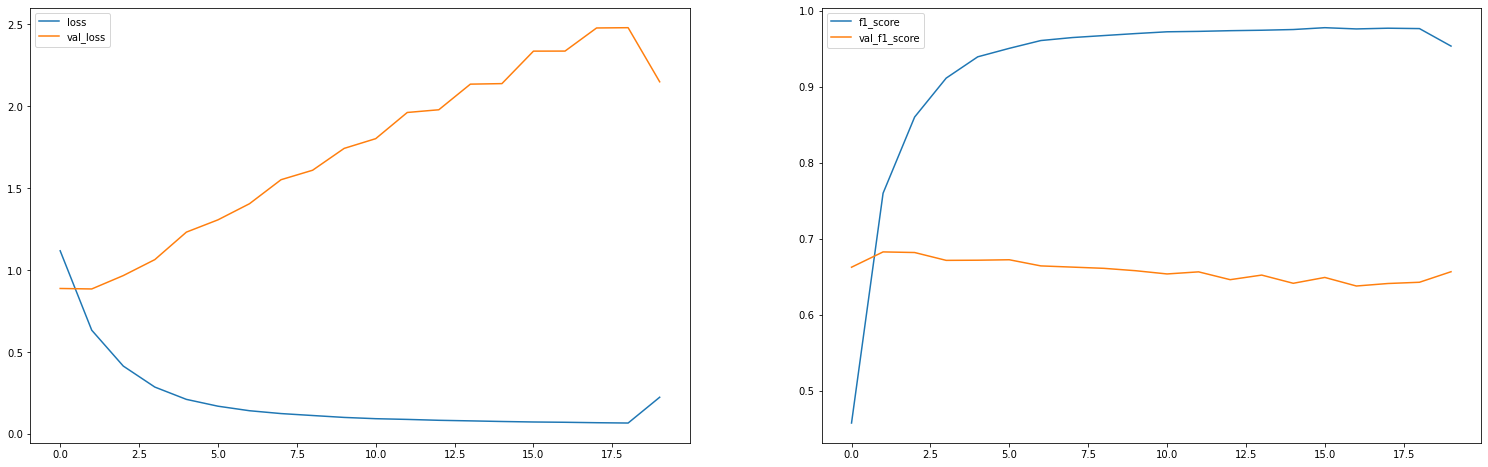

<AxesSubplot:>

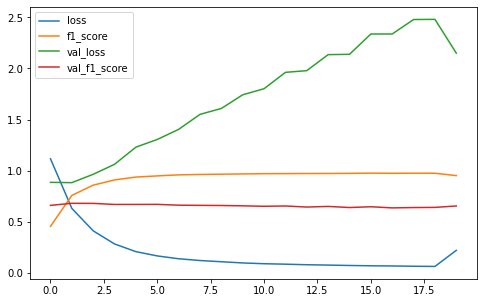

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the learning curves and analyze them
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['f1_score'], label="f1_score")
ax2.plot(history.history['val_f1_score'], label="val_f1_score")
ax2.legend()
plt.show()
# It's possible to plot them very easily using: 
pd.DataFrame(history.history).plot(figsize=(8,5))

$$[TODO - Students]$$ 

> * How do you interpret those learning curves ?

The model appears to overfit the training data. Various strategies could reduce the overfitting but for this lab we will just change the number and size of layers. We will do that a little later.

> * Evaluate the model (on test part) and plot confusion matrix.
> * Are you doing better or worse than with our first attempt with Logistic regression.

How do you interpret those learning curves ? <br>
From the curves above, the training loss is overfitting the validation loss. <br>
This also the case for the training accuracy which is overfitting the validation accuracy <br>
 &#8594; this is Overfitting problem 
 <br> 
 
 The logistic regression model perform with 67% better than the MLP classifier with 64.8%. <br>
 Tuning hyperparameters will be great idea to improve the accuracy of the MLP one 

In [22]:
# Evaluate the model
# Evaluate the model
score = model1.evaluate(X_test_encoded, Y_test)
print('Test loss:', score[0])
print('Test f1_score', score[1])

32/32 [==============================] - 1s 2ms/step - loss: 2.1497 - f1_score: 0.6565
Test loss: 2.149651050567627
Test f1_score 0.6565267443656921


In [23]:
ypred = model1.predict(X_test_encoded)
# Print/plot the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(np.argmax(Y_test, axis=1), y_pred))

[[  0 102  12  12   5  28]
 [  0  23   8   5   4  11]
 [  0  11   3  11  14  32]
 [  0  15   3  13  43  89]
 [  0   8   2  11  33 502]
 [  0   0   0   0   0   0]]


In [24]:
np.argmax(Y_test, axis=1).shape, ypred.shape, Y_test.shape

((1000,), (1000, 5), (1000, 5))

## Hyper-parameters search

Using [KerasTuner] (https://www.tensorflow.org/tutorials/keras/keras_tuner) and modifying various hyper-parameters, improve your model. Change in particular the number of layers, the number of neurons per layer, the dropout, the regularization.

In [31]:
from keras.models import Sequential
from keras.wrappers.scikit_learn  import KerasClassifier
import keras_tuner as kt
def build_model(hp): # Wrap a model 
#function
  NUM_LAYERS = hp.Int("num_layers", 1, 3) # Define hyper-parameters
  NUM_DIMS = hp.Int("num_dims", min_value=32, max_value=128, step=32)
  ACTIVATION = hp.Choice("activation", ["relu", "tanh"])
  DROPOUT = hp.Boolean("dropout")
  DROP_RATE = hp.Choice("drop_rate", values=[0.2, 0.25, 0.5])
  input_layer = Input(shape=(input_dim,), name='input') 
  h = input_layer # with hyper-parameters
  for i in range(NUM_LAYERS):
     h = Dense(NUM_DIMS//(2*i+1), activation=ACTIVATION)(h)
     if DROPOUT:
            h = Dropout(rate=DROP_RATE)(h)
  outputs = Dense(output_dim, activation='softmax', name='output')(h)
  model1=Model(input_layer,outputs)
  model1.compile(
        optimizer='adam',
        loss="categorical_crossentropy",
        metrics=[f1_score],
               )
  return model1
# model1 = KerasClassifier(build_fn = build_model)

In [32]:
tuner = kt.BayesianOptimization(build_model,kt.Objective("val_f1_score", direction="max"),max_trials=10
                                ,overwrite=True)
# tuner = kt.BayesianOptimization(build_model,
# objective="val_accuracy",
# max_trials=10,
# overwrite=True,
# directory='my_dir')

In [33]:
X_train_encoded.shape,Y_train.shape, X_test_encoded.shape, Y_test.shape

((5000, 8991), (5000, 5), (1000, 8991), (1000, 5))

In [34]:
# Search for hyper-parameters
ea = EarlyStopping(monitor='val_f1_score', mode='max', 
                   patience=20, restore_best_weights=True)

In [35]:
tuner.search(X_train_encoded, Y_train, epochs=20, validation_data=(X_test_encoded,Y_test),
callbacks=[ea])


Trial 10 Complete [00h 01m 33s]
val_f1_score: 0.6823104023933411

Best val_f1_score So Far: 0.6931363940238953
Total elapsed time: 00h 11m 52s
INFO:tensorflow:Oracle triggered exit
